# Midtest - Usecase Python (Annual Water Usage Case)

## By Firdaus Adi Nugroho

In [259]:

# scipy
import scipy 
# numpy
import numpy as np
# pandas
import pandas as pd
# scipy
import scipy
# numpy
import numpy
# matplotlib
import matplotlib.pyplot as plt
# pandas
import pandas as pd
# scikit-learn
import sklearn
# statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


import seaborn as sns



plt.style.use('fivethirtyeight')

# Dataset
Annual Water Usage in Baltimore
The dataset is credited to Hipel an Mcleod, 1994.

# Background
The Dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79
years of data.
The values are in the units of liters per capita per day, and there are 79 observations.

# Objectives
Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to predict annual water usage.

# Usecase Instruction
1. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).
2. Create summary of the dataset, with python function.
3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.
4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.
5. Create models using ARIMA<br>
    5.1 Split the dataset into train and test sets directly<br>
    5.2 The first 50% of the dataset will be held back to train the model.<br>
    5.3 The remaining 50% of the dataset will be iterated and test the model.<br>
    5.4 The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.<br>
    5.5 Use an ARIMA(0,1,0) on the raw data may be a good starting point.<br>
    5.6 When model trained, a one-step prediction made ang the prediction stored for later evaluation.<br>
    5.7 The actual observation from the test dataset woll be added to the training dataset for the next iteration.<br>
    5.8 The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.<br>
6. Calculate the RMSE using the helper function from the scikit-learn library, from dataset only<br>
    6.1 Those RMSE will show you on average, how much the error/the model was wrong/gap between predection and expected value per capita per day for each prediction made.

## 1. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).

In [260]:
df=pd.read_csv('water1.txt', names=['Year','Water'],skiprows=(0,81))
df = df.set_index('Year')
series = pd.Series(df['Water'])
series.head()

Year
1885    356
1886    386
1887    397
1888    397
1889    413
Name: Water, dtype: int64

In [261]:
split_point = len(series)-10
data = pd.DataFrame(series[0:split_point], columns = ['Water'])
validation = pd.DataFrame(series[split_point:],columns = ['Water'])
data.to_csv('dataset.csv',index=True)
validation.to_csv('validation.csv',index=True)

In [262]:
validation.head(3)

,Water
Year,
1954,568
1955,575
1956,579


### 2. Create summary of the dataset, with python function.

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 1885 to 1963
Data columns (total 1 columns):
Water    79 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


In [264]:
df.describe()

,Water
count,79.000000
mean,512.025316
std,75.685072
min,344.000000
25%,462.000000
50%,503.000000
75%,581.000000
max,662.000000


In [265]:
df.shape

(79, 1)

### 3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.

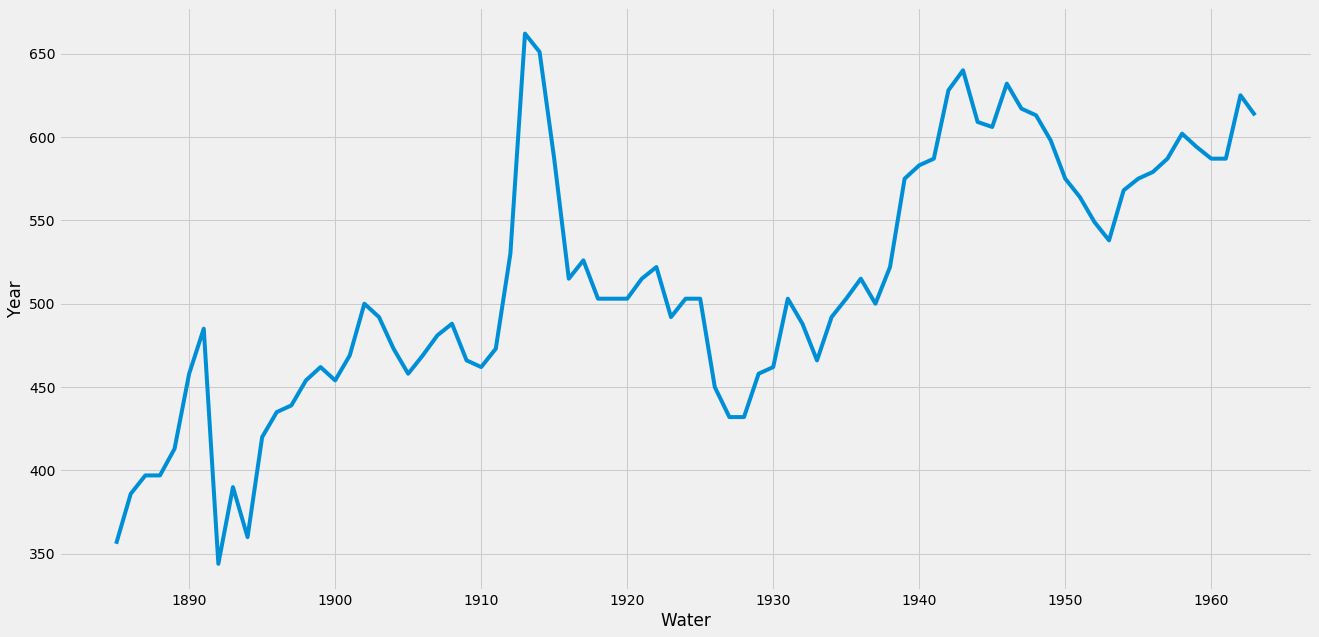

In [266]:
plt.figure(figsize=(20,10))
ax=plt.gca()
ax.set_ylabel('Year')
ax.set_xlabel('Water')
plt.plot(series)

## 4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.

In [267]:
decade = df.groupby((series.index//10)*10).sum()
decade.head()

,Water
Year,
1880,1949
1890,4247
1900,4750
1910,5412
1920,4810


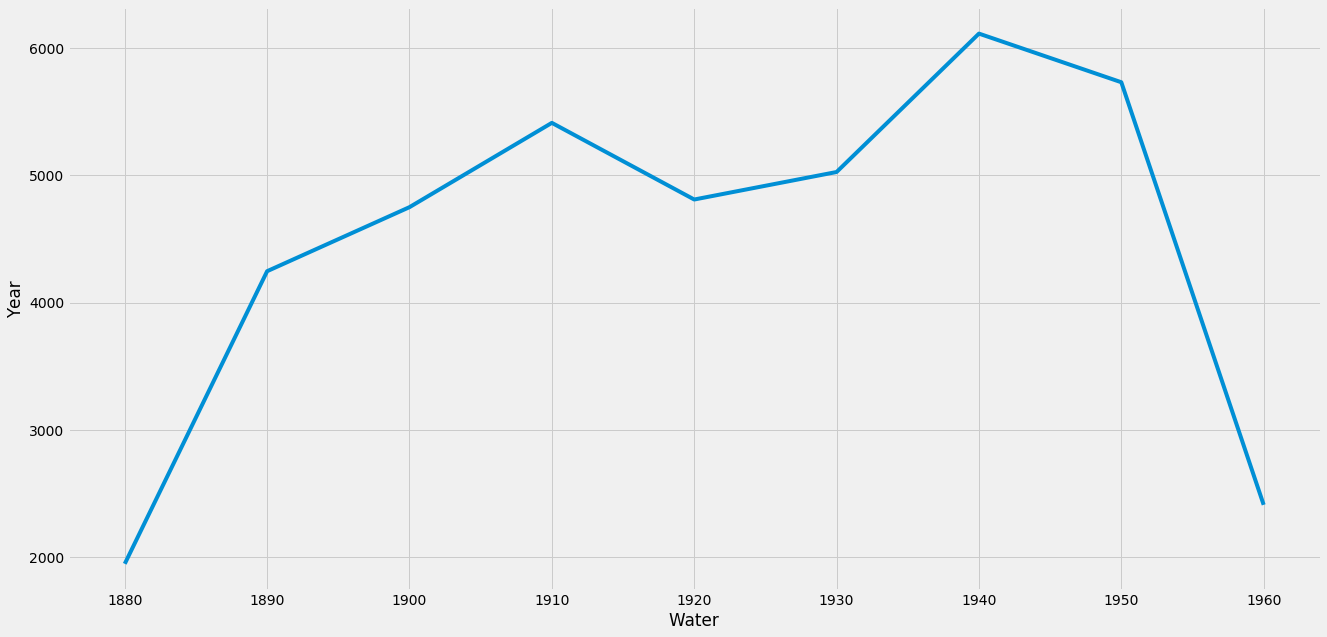

In [268]:
plt.figure(figsize=(20,10))
ax=plt.gca()
ax.set_ylabel('Year')
ax.set_xlabel('Water')
plt.plot(decade)

## 5. Create models using ARIMA

### 5.1 Split the dataset into train and test sets directly
### 5.2 The first 50% of the dataset will be held back to train the model.

In [269]:
from sklearn.model_selection import train_test_split

data = data.values
data = data.astype('float32')
test_size=int(len(data)*0.51)
train, test = data[:test_size],data[test_size:]

In [270]:
print('Train data: ',train.shape[0])

Train data:  35


### 5.3 The remaining 50% of the dataset will be iterated and test the model.

In [271]:
print('Test data: ',test.shape[0])

Test data:  34


### 5.4 The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.

In [272]:
arima_order = (0,1,0)

### 5.5 Use an ARIMA(0,1,0) on the raw data may be a good starting point.

In [273]:
from statsmodels.tsa.arima_model import ARIMA
arima_order = (0,1,0)
arima = ARIMA(train,order=arima_order)
arima_fit = arima.fit()
print(arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   34
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -176.424
Method:                           css   S.D. of innovations             43.380
Date:                Thu, 10 Oct 2019   AIC                            356.847
Time:                        15:29:03   BIC                            359.900
Sample:                             1   HQIC                           357.888
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3235      7.440      0.581      0.565     -10.258      18.905


### 5.6 When model trained, a one-step prediction made ang the prediction stored for later evaluation.

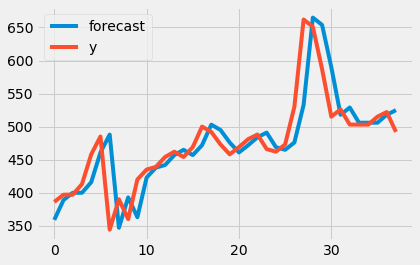

In [278]:
arima_fit.plot_predict(1,38,plot_insample=True)
x = arima_fit.forecast(steps=38)

Visualisasi dari hasil melakukan pemodelan untuk data training saja. Dengan catatan belom dilakukan pengecekan interasi yang akan dilakukan pada data training

### 5.7 The actual observation from the test dataset woll be added to the training dataset for the next iteration.
### 5.8 The predictions made during the enumeration of the test dataset will beevaluated and an RMSE score reported.

In [275]:
history = [x for x in train]
prediction = list()
for i in range(len(test)):
    #predict
    arima = ARIMA(history, order=(0,1,0))
    arima_fit = arima.fit(disp=0)
    yhat = arima_fit.forecast()[0]
    prediction.append(yhat)
    #observation
    obs = test[i]
    history.append(obs)
    print('>predicted=%.3f, Expected=%3.f' % (yhat,obs))

>predicted=507.324, Expected=503
>predicted=507.200, Expected=515
>predicted=519.417, Expected=522
>predicted=526.486, Expected=492
>predicted=495.579, Expected=503
>predicted=506.769, Expected=503
>predicted=506.675, Expected=450
>predicted=452.293, Expected=432
>predicted=433.810, Expected=432
>predicted=433.767, Expected=458
>predicted=460.318, Expected=462
>predicted=464.356, Expected=503
>predicted=506.196, Expected=488
>predicted=490.809, Expected=466
>predicted=468.292, Expected=492
>predicted=494.776, Expected=503
>predicted=505.940, Expected=515
>predicted=518.118, Expected=500
>predicted=502.769, Expected=522
>predicted=525.132, Expected=575
>predicted=579.056, Expected=583
>predicted=587.127, Expected=587
>predicted=591.125, Expected=628
>predicted=632.772, Expected=640
>predicted=644.897, Expected=609
>predicted=613.288, Expected=606
>predicted=610.167, Expected=632
>predicted=636.525, Expected=617
>predicted=621.210, Expected=613
>predicted=617.079, Expected=598
>predicted

## 6. Calculate the RMSE using the helper function from the scikit-learn library, from dataset only
### 6.1 Those RMSE will show you on average, how much the error/the model was wrong/gap between predection and expected value per capita per day for each prediction made.

In [276]:
#reprot performance
mse = mean_squared_error(test,prediction)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 22.624


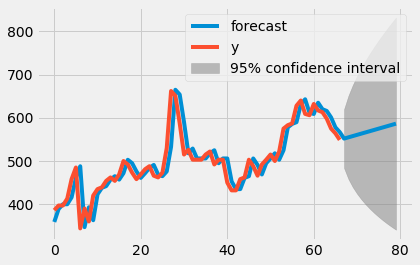

In [277]:
arima_fit.plot_predict(1,80,plot_insample=True)
x = arima_fit.forecast(steps=80)

# Kesimpulan
Dataset Annual Water Usage di kota Baltimore dari tahun 1885 hingga 1963. Pada observasi time series ini, saya melakukan split data mejadi dua yaitu data training(data yang digunakan untuk melakukan observasi model), dan data test(data yang digunakan untuk mengevaluasi model dan testing model). Dari total 69 data yang ada pada padaset, data training displit menjadi 51% dari 69 data (35 data) dan data testing menjadi 49% dari 69 total data(34 data).<br>
Pada akhirnya, hasil model itu tersebut akan dilakukan training dari model secara terus-meneurs(iterasi). Sehingga kita dapat lihat hasil dari hasil iterasi di grafik diatas.<br>
Tingkat keakuratan menggunakan Root Mean Squared Error(RMSE). RMSE adalah metode alternatif untuk mengevaluasi teknik peramalan yang digunakan untuk mengukur tingkat akurasi hasil prakiraan suatu model. RMSE merupakan nilai rata-rata dari jumlah kuadrat kesalahan, juga dapat menyatakan ukuran besarnya kesalahan yang dihasilkan oleh suatu model prakiraan.<br> Nilai dari RMSE pemodelan kali ini ialah 22,624 dimana hasil tersebut cukup bagus